# Introduction to  Support Vector Machines (SVM)

### r Machines (SVM):
Support Vector Machines (SVM) is a powerful supervised learning algorithm used for classification and regression tasks. In classification, SVM aims to find the optimal hyperplane that best separates the data points of different classes. The hyperplane is chosen such that the margin, which represents the distance between the hyperplane and the nearest data points (called support vectors), is maximized.

SVM can handle both linear and non-linear classification problems by using different kernel functions, such as linear, polynomial, radial basis function (RBF), and sigmoid kernels. These kernel functions transform the input features into a higher-dimensional space where the classes become linearly separable, allowing SVM to find complex decision boundaries.

SVM is particularly effective in high-dimensional spaces and with datasets that have clear margin of separation between classes. It is robust against overfitting, thanks to the margin maximization objective, and it performs well even in cases where the number of features exceeds the number of samples.

In [55]:
#import statndard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [56]:
#load the data
from sklearn.datasets import load_iris
iris = load_iris()

In [57]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [58]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [60]:
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [65]:
#appending target variable
df['target'] = iris.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [63]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [66]:
df['name_of_flower'] = df.target.apply(lambda x: iris.target_names[x])
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,name_of_flower
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


### Data visualization

In [67]:
#create datafrsmes for the tyes of flowers
df0 = df[df.target == 0]
df1 = df[df.target == 1]
df2 = df[df.target == 2]

In [68]:
df0.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,name_of_flower
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa


In [69]:
df1.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,name_of_flower
50,7.0,3.2,4.7,1.4,1,versicolor
51,6.4,3.2,4.5,1.5,1,versicolor


In [70]:
df2.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,name_of_flower
100,6.3,3.3,6.0,2.5,2,virginica
101,5.8,2.7,5.1,1.9,2,virginica


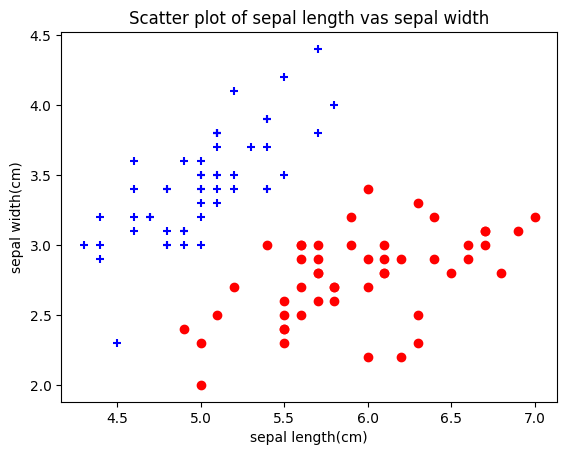

In [71]:
plt.scatter(df0["sepal length (cm)"], df0["sepal width (cm)"], color = 'blue', marker= '+')
plt.scatter(df1["sepal length (cm)"], df1["sepal width (cm)"], color = 'red', marker= 'o')
plt.title("Scatter plot of sepal length vas sepal width")
plt.xlabel("sepal length(cm)")
plt.ylabel("sepal width(cm)")
plt.show()

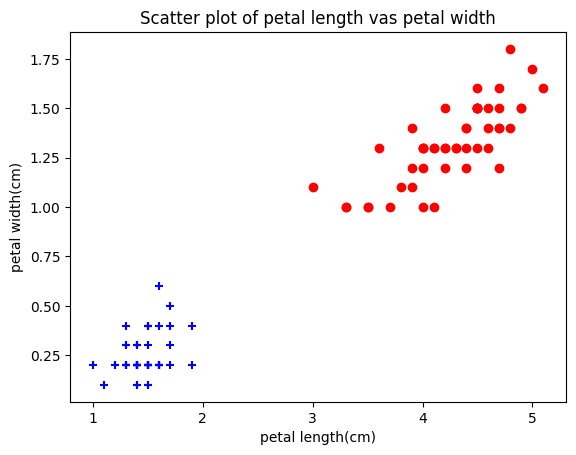

In [72]:
# scatter plot of petals
plt.scatter(df0["petal length (cm)"], df0["petal width (cm)"], color = 'blue', marker= '+')
plt.scatter(df1["petal length (cm)"], df1["petal width (cm)"], color = 'red', marker= 'o')
plt.title("Scatter plot of petal length vas petal width")
plt.xlabel("petal length(cm)")
plt.ylabel("petal width(cm)")
plt.show()

In [73]:
from sklearn.model_selection import train_test_split

In [74]:
df.head(1)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,name_of_flower
0,5.1,3.5,1.4,0.2,0,setosa


In [75]:
X = df.drop(['target', "name_of_flower"], axis = 1)

In [76]:
y = df.target

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2)

In [78]:
from sklearn.svm import SVC

In [79]:
model = SVC()

In [80]:
model.fit(X_train, y_train)

SVC()

In [81]:
model.score(X_test, y_test)

0.9333333333333333

the model has 93% accuracy